In [1]:
%pylab inline
from random import *
from observational_data import *
from constants import *
from functions import *

Populating the interactive namespace from numpy and matplotlib


In [41]:
pl_L_min = 17.5                     # Axis limits
pl_L_max = 18.5                     #
pl_M_min = 10.5                     #
pl_M_max = 12.0                     #
pl_B_min =  0.0                     #
pl_B_max =  1.6                     #
pl_G_min =  0.0                     #
pl_G_max =  0.9                     #

pl_L_ticks = [17.5,18.0,18.5]        # Ticks
pl_M_ticks = [10.5,11.0,11.5]        #
pl_M_tickZ = [10.5,11.0,11.5,12.0]   #
pl_B_ticks = [0.0,0.5,1.0,1.5]       #
pl_G_ticks = [0.0,0.2,0.4,0.6,0.8]   #

    
def CalculeBestParameters(name, name2, DustFile, DUST, A):
    """
    Calcule the Best Parameters over the A set of boxes
    
    name    = string. Search in the directories. 
                       Accepted values: "OD2", "OD3", "OD4"
    name2   = string. Name to print in the plots. 
                       Accepted values: "Bouwens", 
                                        "McLure", 
                                        "Finkelstein"
    DustFile= string. Search in the directories. 
                       Accepted values: "w_dust", "wo_dust"
    DUST    = string. Information to print in the plots. 
                       Accepted values:    'with dust attenuation'
                                           'without dust attenuation'
    A       = list.   The list of boxes to calculate the best parameters.
                       Accepted values: range(0,8)
    """
    
    output = open('analysis/'+str(name)+'/Best_Parameters_'+DustFile+'.dat', 'w')
    output.write(
'# log10(L_0), -delta, +delta, log10(M_0), -delta, +delta,beta, -delta, +delta, gamma, -delta, +delta\n')

    for BoxNum in A:
        # Open the raw data from Markov Chain-MoteCarlo
        # L_0 	 M_0 	 beta 	 gamma 	 chi_sqr 	 Number of Bins
        if (Dust_Ext == 1): 
            MCMC_raw = np.loadtxt('results_w_ext_'+name+'/'+
                                  str(BoxNum)+'.dat',usecols=(0,1,2,3,4,5),skiprows=0); 
        else:
            MCMC_raw = np.loadtxt('results_wo_ext_'+name+'/'+
                                  str(BoxNum)+'.dat',usecols=(0,1,2,3,4,5),skiprows=0); 
        BoxLength = 250.0 # Mpc h^{-1}
        PointSize = 1.0


        minim = where( MCMC_raw[:,4] == MCMC_raw[:,4].min() )[0] 
        L_best     = MCMC_raw[minim,0][0]
        M_best     = MCMC_raw[minim,1][0]
        B_best     = MCMC_raw[minim,2][0]
        G_best     = MCMC_raw[minim,3][0]
        chi_sqr_min= MCMC_raw[minim,4][0]

        chi2_cut = chi_sqr_min*exp(0.5)         #####  Likelihood Ratio

        index = np.where( (MCMC_raw[:,4]<=chi2_cut) )[0]

        L = MCMC_raw[index,0]
        M = MCMC_raw[index,1]
        B = MCMC_raw[index,2]
        G = MCMC_raw[index,3]
        X = MCMC_raw[index,4]


        #print L_best, L.min()-L_best, L.max()-L_best
        #print M_best, M.min()-M_best, M.max()-M_best
        #print B_best, B.min()-B_best, B.max()-B_best
        #print G_best, G.min()-G_best, G.max()-G_best

        for i in range(4):
            output.write(str(MCMC_raw[minim,i][0])+','+
                         str(-MCMC_raw[index,i].min()+MCMC_raw[minim,i][0])+',+'+
                         str(MCMC_raw[index,i].max()-MCMC_raw[minim,i][0])+',')
        output.write('\n')

    output.close()

    
    
def TheAwesomePlot(name, name2, DustFile, DUST, BoxNum):
    """
    Plots the Awesome Corner plot for a given box and dataset.
    
    name    = string. Search in the directories. 
                       Accepted values: "OD2", "OD3", "OD4"
    name2   = string. Name to print in the plots. 
                       Accepted values: "Bouwens", 
                                        "McLure", 
                                        "Finkelstein"
    DustFile= string. Search in the directories. 
                       Accepted values: "w_dust", "wo_dust"
    DUST    = string. Information to print in the plots. 
                       Accepted values:    'with dust attenuation'
                                           'without dust attenuation'
    BoxNum  = integer. The box to plot.
                       Accepted values: 0,1,2,3,4,5,6,7
    """
    ######################################################## Loading data
    if (Dust_Ext == 1): 
        MCMC_raw = np.loadtxt('results_w_ext_'+name+'/'+str(BoxNum)+'.dat',
                              usecols=(0,1,2,3,4,5),skiprows=0); 
    else:
        MCMC_raw = np.loadtxt('results_wo_ext_'+name+'/'+str(BoxNum)+'.dat',
                              usecols=(0,1,2,3,4,5),skiprows=0); 
    BoxLength = 250.0 # Mpc h^{-1}
    PointSize = 1.0

    minim = where( MCMC_raw[:,4] == MCMC_raw[:,4].min() )[0] 
    L_best     = MCMC_raw[minim,0][0]
    M_best     = MCMC_raw[minim,1][0]
    B_best     = MCMC_raw[minim,2][0]
    G_best     = MCMC_raw[minim,3][0]
    chi_sqr_min= MCMC_raw[minim,4][0]
    
    chi2_cut = chi_sqr_min*exp(0.5)         #####  Likelihood Ratio
    
    index = np.where( (MCMC_raw[:,4]<=chi2_cut) )[0]

    L = MCMC_raw[index,0]
    M = MCMC_raw[index,1]
    B = MCMC_raw[index,2]
    G = MCMC_raw[index,3]
    X = MCMC_raw[index,4]


    ##########################################################  The Awesome Corner Plot
    
    ColorMin = chi_sqr_min                # Color Limits
    ColorMax = chi2_cut                   #    
    
    FS_lbl = 24                           # Font size for Labels
    FS_tck = 12                           # Font size for Ticks
    
    
    fig = figure(figsize=(10,8))

    gs1 = GridSpec(3,3)                   # Array with 3x3 plots
    gs1.update( left=0.07, right=0.87,    #
               wspace=0.1, hspace=0.1)    #
    ax0 = plt.subplot(gs1[0,0])           # Position of plot in the array
    ax1 = plt.subplot(gs1[0,1])           # 
    ax2 = plt.subplot(gs1[1,1])           #  ax0  ax1  ax3   ax99
    ax3 = plt.subplot(gs1[0,2])           #       ax2  ax4   ax99
    ax4 = plt.subplot(gs1[1,2])           #            ax5   ax99
    ax5 = plt.subplot(gs1[2,2])           #

    gs2 = GridSpec(1,1)                   # Array with Colorbar
    gs2.update( left = 0.9, right=0.92)   #
    ax99 = plt.subplot(gs2[:,:])          #

    cmap = plt.get_cmap('jet_r', 100)     # colormap
    cmap.set_under('gray')                # colormap
    
    ax_list = [ax0, ax1, ax2, ax3, ax4, ax5]

    im = ax0.scatter(G, B, c=X, s=PointSize, cmap=cmap, 
                     vmin=ColorMin, vmax=ColorMax, edgecolors='none')
    ax1.scatter(M, B, c=X, s=PointSize, cmap=cmap, 
                vmin=ColorMin, vmax=ColorMax, edgecolors='none')
    ax2.scatter(M, G, c=X, s=PointSize, cmap=cmap, 
                vmin=ColorMin, vmax=ColorMax, edgecolors='none')
    ax3.scatter(L, B, c=X, s=PointSize, cmap=cmap, 
                vmin=ColorMin, vmax=ColorMax, edgecolors='none')
    ax4.scatter(L, G, c=X, s=PointSize, cmap=cmap, 
                vmin=ColorMin, vmax=ColorMax, edgecolors='none')
    ax5.scatter(L, M, c=X, s=PointSize, cmap=cmap, 
                vmin=ColorMin, vmax=ColorMax, edgecolors='none')

    fig.colorbar(im,ax99, extend='neither')  # Colorbar


    ax1.xaxis.set_major_formatter(plt.NullFormatter())   # Remove tics in x and
    ax1.yaxis.set_major_formatter(plt.NullFormatter())   # y axis for the middle
    ax3.xaxis.set_major_formatter(plt.NullFormatter())   # plots
    ax3.yaxis.set_major_formatter(plt.NullFormatter())   #
    ax4.xaxis.set_major_formatter(plt.NullFormatter())   #
    ax4.yaxis.set_major_formatter(plt.NullFormatter())   #

    ax0.set_ylim([pl_B_min,pl_B_max])          # Range of axis
    ax1.set_ylim([pl_B_min,pl_B_max])          #
    ax3.set_ylim([pl_B_min,pl_B_max])          #
    ax0.set_xlim([pl_G_min,pl_G_max])          #
    ax2.set_ylim([pl_G_min,pl_G_max])          #
    ax4.set_ylim([pl_G_min,pl_G_max])          #
    ax2.set_xlim([pl_M_min,pl_M_max])          #
    ax1.set_xlim([pl_M_min,pl_M_max])          #
    ax5.set_ylim([pl_M_min,pl_M_max])          #
    ax3.set_xlim([pl_L_min,pl_L_max])          #
    ax4.set_xlim([pl_L_min,pl_L_max])          #
    ax5.set_xlim([pl_L_min,pl_L_max])          #
    
    ax0.set_yticks(pl_B_ticks)                 # Ticks
    ax0.set_xticks(pl_G_ticks)                 # labels
    ax2.set_yticks(pl_G_ticks)                 #
    ax2.set_xticks(pl_M_ticks)                 #
    ax5.set_yticks(pl_M_tickZ)                 #
    ax5.set_xticks(pl_L_ticks)                 #

    for ax in ax_list:                                # Ticks
        for tick in ax.xaxis.get_major_ticks():       # Fontsize
            tick.label.set_fontsize(FS_tck)           #
        for tick in ax.yaxis.get_major_ticks():       #
            tick.label.set_fontsize(FS_tck)           #
                                                           # Labels
    fig.text(0.02,0.78,LABELS[2], fontsize=FS_lbl)         # beta
    fig.text(0.16,0.52,LABELS[3], fontsize=FS_lbl)         # gamma
    fig.text(0.40,0.25,LABELS[1], fontsize=FS_lbl)         # Log(M_0)
    fig.text(0.95,0.52,LABELS[4], fontsize=FS_lbl)         # chi2
    ax5.set_xlabel(LABELS[0], fontsize=FS_lbl, rotation=0) # Log(L_0)

    fig.text(0.02,0.25,'MCMC over', fontsize=24)                           # Text
    fig.text(0.02,0.20,name2+' Dataset', fontsize=24)                      # 
    fig.text(0.02,0.14,'Best '+str(index.size)+' parameters', fontsize=18) # chi2
    if Dust_Ext==1:
        fig.text(0.02,0.10,'with dust attenuation for box #'+str(BoxNum), fontsize=18) 
        #fig.savefig('./analysis/'+str(name)+'/'+str(name)+'_w_dust_box_'+str(BoxNum)+'.png')
    else:
        fig.text(0.02,0.10,'without dust attenuation for box #'+str(BoxNum), fontsize=18)
        #fig.savefig('./analysis/'+str(name)+'/'+str(name)+'_wo_dust_box_'+str(BoxNum)+'.png')


    ##########################################################  End of The Awasome Corner Plot
    
def PlotCosmicVariance1(name, name2, DustFile, DUST, A):
    """
    Calcule and Plot the Cosmic Variance of parameters
    against 
    
    name    = string. Search in the directories. 
                       Accepted values: "OD2", "OD3", "OD4"
    name2   = string. Name to print in the plots. 
                       Accepted values: "Bouwens", 
                                        "McLure", 
                                        "Finkelstein"
    DustFile= string. Search in the directories. 
                       Accepted values: "w_dust", "wo_dust"
    DUST    = string. Information to print in the plots. 
                       Accepted values:    'with dust attenuation'
                                           'without dust attenuation'
    A       = list.   The list of boxes to calculate the best parameters.
                       Accepted values: range(0,8)
    """

    output = open('analysis/'+name+'/CosmicVariance_'+DustFile+'.dat' , 'w' )

    filename = 'analysis/'+name+'/Best_Parameters_'+DustFile+'.dat'    
    param = np.loadtxt(filename, delimiter=',', usecols=[0,1,2,3,4,5,6,7,8,9,10,11])

    for k in range(4):
        output.write(str(LABELS[k])+
                     ', mean value = '+
                     str(mean(param[:,3*k+0]))+
                     ', cosmic std dev='+
                     str(std(param[:,3*k+0]))+
                     ', mean sigma per box ='+
                     str(mean(sqrt(param[:,3*k+1]**2 + 
                                   param[:,3*k+2]**2)))+'\n' )
    output.close()

    
    FS_lbl = 25
    FS_tck = 15
    
    fig = figure(figsize=(12, 9))
    suptitle('Parameter estimation over each box\nFor '+
             name2+' data '+DUST , fontsize=30)
    fig.subplots_adjust(hspace=0.20, wspace=0.25,top=0.85, right=0.9, bottom=0.1)
    
    ax1=fig.add_subplot(221); 
    ax2=fig.add_subplot(222); 
    ax3=fig.add_subplot(223); 
    ax4=fig.add_subplot(224);
    ax = [ax1,ax2,ax3,ax4]
    
    for k in range(0,4):
        ax[k].errorbar(range(0,BOXES),param[:,3*k+0],
                       yerr=[param[:,3*k+1],param[:,3*k+2]],
                       ls='-', marker='')
        ax[k].set_ylabel(LABELS[k], fontsize=FS_lbl)
        ax[k].set_xlim(-1,BOXES)
        
        for tick in ax[k].xaxis.get_major_ticks():
            tick.label.set_fontsize(FS_tck) 
        for tick in ax[k].yaxis.get_major_ticks():
            tick.label.set_fontsize(FS_tck)

    ax1.set_ylim(pl_L_min,pl_L_max)
    ax2.set_ylim(pl_M_min,pl_M_max)
    ax3.set_ylim(pl_B_min,pl_B_max)
    ax4.set_ylim(pl_G_min,pl_G_max)


In [4]:
##################  Name of the Observed Dataset
name = "OD4"
name2 = 'Finkelstein'


BOXES = 8
A = range(0,BOXES)
LABELS = ["$\log_{10}(L_0)$", "$\log_{10}(M_0)$", r"$\beta$", r"$\gamma$", r"$\chi^2$"]

if Dust_Ext==1:
    DustFile=str('w_dust')
    DUST = str('with dust attenuation')
else:
    DustFile=str('wo_dust')
    DUST = str('without dust attenuation') 
    

In [6]:
CalculeBestParameters("OD2", "Bouwens", DustFile, DUST, A)

CalculeBestParameters("OD3", "McLure", DustFile, DUST, A)

CalculeBestParameters("OD4", "Finkelstein", DustFile, DUST, A)


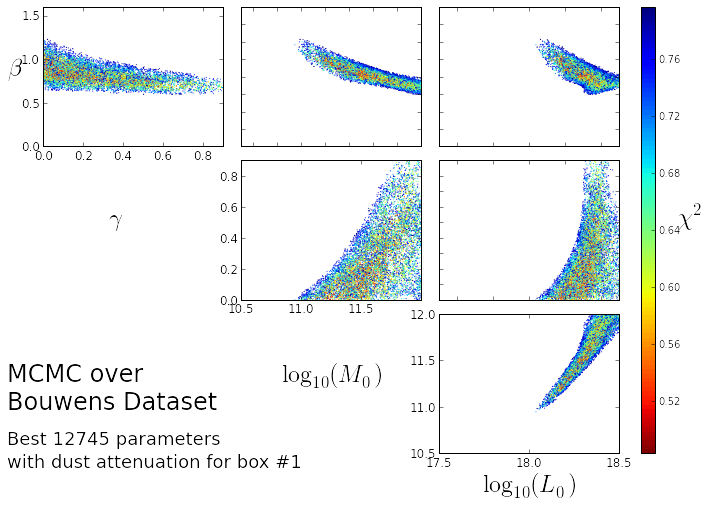

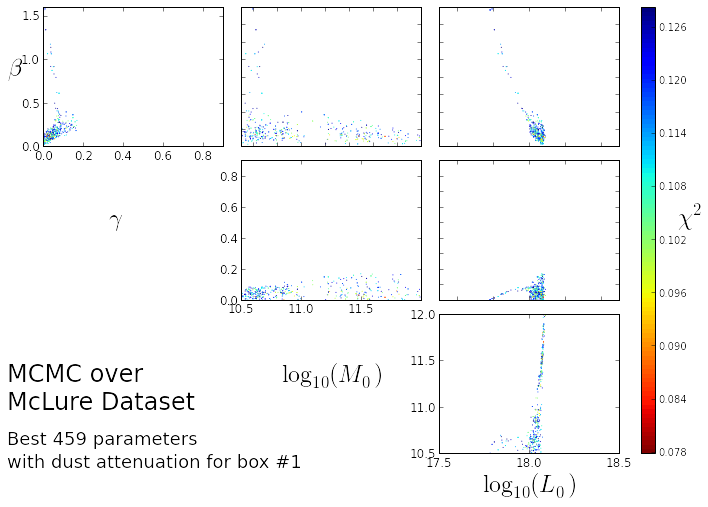

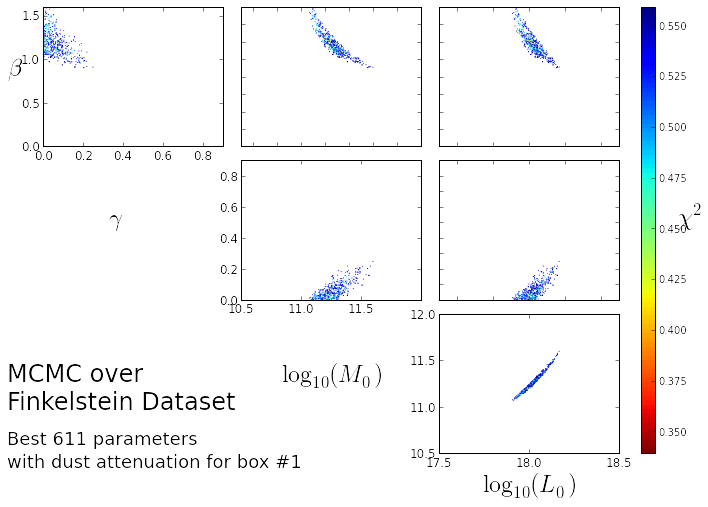

In [28]:
TheAwesomePlot("OD2", "Bouwens", DustFile, DUST, 1)

TheAwesomePlot("OD3", "McLure", DustFile, DUST, 1)

TheAwesomePlot("OD4", "Finkelstein", DustFile, DUST, 1)

#Show best parameters histograms over 8 boxes
21-apr-2015

Calculated with Likelihood Ratio 0.5

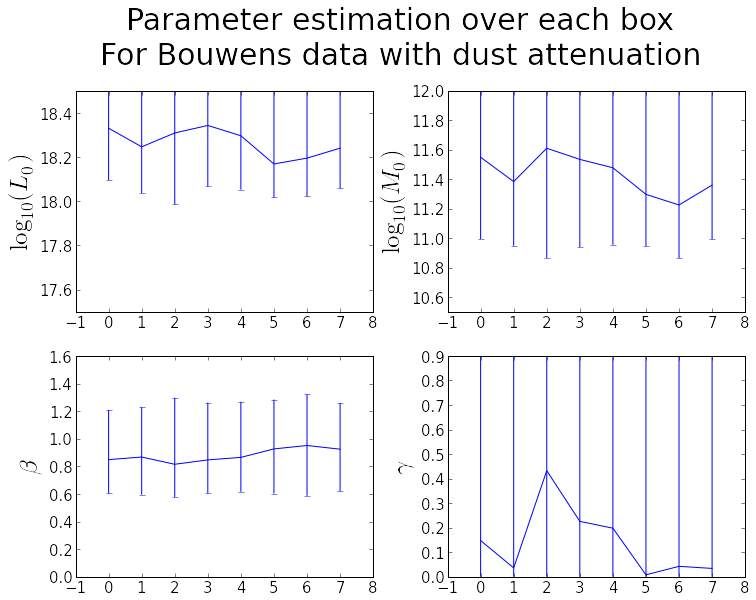

In [39]:
PlotCosmicVariance1("OD2", "Bouwens", DustFile, DUST, A)